# Most frequent words
### using nltk and matplotlib

First, we import a python library called Natural Language Toolkit, short nltk. The nltk is a library in Python that provides tools to work with human language data (text). It includes modules for tokenization, stemming, and tagging, and is used for natural language processing (NLP). 

Second, we import the python module called 'string', which contains a collection of strings: all ASCII letters, digits, and special characters. This module is not essential and can be left out, but it simplifies the cleaning of the data (more on that later). 

Third, we import the submodule 'pyplot' from the matplotlib library. We create an alias called 'plt', which we use to call functions from the pyplot module. The matplotlib library is used to create various types of charts, bars and other visualization types.

In [1]:
import nltk
import string
import matplotlib.pyplot as plt

We then download the English stopwords ('stopwords') and punctuation ('punkt') list from the nltk module. Stopwords are common words like 'the', 'and', 'I', etc. that are very frequent in text, and do not convey insights into the specific topic of a document. We download these two packages so we can remove them from our results later on.

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dittm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dittm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

We then open the text file of our short story "The Ice Man" by Haruki Murakami

In [3]:
with open('texts/nlp/ice_man.txt', 'r', encoding='utf-8') as f:
    text = f.read()

We then tokenize the text and get a list of all the words. We do this by using the word_tokenize() function included in nltk

In [4]:
words = nltk.word_tokenize(text)

Now we transform the tokens into lowercase by using list comprehension, so that e.g. 'ice' and 'Ice' would be treated as one entity later on:

In [5]:
words = [ line.strip().lower() for line in words if line]

In the next step we remove stopwords and punctuation from the list of words. We start by using the stopwords.words('english') function to get all English stopwords from the nltk.corpus module. This list is then assigned to a variable called stopwords.
For punctuation, we get the 'punctuation' constant from the string module and assign the list to a variable called 'punctuation'.

In [6]:
stopwords = nltk.corpus.stopwords.words('english')
punctuation = string.punctuation + '’'

For the 'punctuation' variable, I had to manually add + '’' because the character '’' is not included in the 'punctuation' constant and was therefore not removed. Only these characters are included in the 'punctuation' constant: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~

If you do not want to use 'import string' at all, you can just manually make a list of all punctuations that you might not want included in the results.

We then use list comprehension to create a new list called 'filtered_words' that consists of all words in the 'words' list that meet the following criteria:
1. the word is not in the 'stopwords' list
2. the word is not in the 'punctuation' list

We additionally use the word.lower() function to convert the words in the list to lower case for better comparison. Thus, ['Man', 'ice', 'Mountain'] becomes ['man', 'ice', 'mountain']

In [7]:
filtered_words = [word for word in words if word not in stopwords and word not in punctuation]

We then use the FreqDist() function from nltk to get a frequency distribution of our filtered words.

In [8]:
fdist = nltk.FreqDist(filtered_words)

We can then use the most_common() function to get the 30 most common words and their frequencies.

In [9]:
most_common = fdist.most_common(30)
most_common

[('ice', 89),
 ('man', 64),
 ('even', 26),
 ('really', 23),
 ('said', 22),
 ('like', 21),
 ('know', 20),
 ('south', 20),
 ('go', 17),
 ('husband', 17),
 ('would', 17),
 ('pole', 17),
 ('little', 15),
 ('past', 14),
 ('want', 13),
 ('one', 12),
 ('never', 12),
 ('could', 12),
 ('see', 12),
 ('place', 11),
 ('looked', 11),
 ('talk', 11),
 ('away', 11),
 ('time', 10),
 ('world', 10),
 ('made', 10),
 ('something', 10),
 ('anything', 10),
 ('future', 10),
 ('people', 9)]

We then extract the words and frequencies into separate lists.

In [10]:
words, frequencies = zip(*most_common)

The zip() method combines multiple iterables, such as lists or tuples, into a single iterator of tuples. The * operator is used to separate the elements within an iterable into separate arguments for the zip() function. This comes in very handy for our task because 

if 'most_common' contained [('ice', 67), ('man', 64)], then words, frequencies = zip(*most_common) would return ['ice', 'man'] for the 'words' list and [67, 64] for the 'frequencies' list. Thus the 'words' list now only contains the words and the 'frequencies' list only contains the frequencies.

We then use the figure() function from the matplotlib.pyplot module to configure the size of our bar diagram. For our diagram, I set the width to 30 inches and the height to 10 inches.
In the next line, we use the bar() function with values from the lists 'words' and 'frequences'.
With the show() function, we display the bar chart.

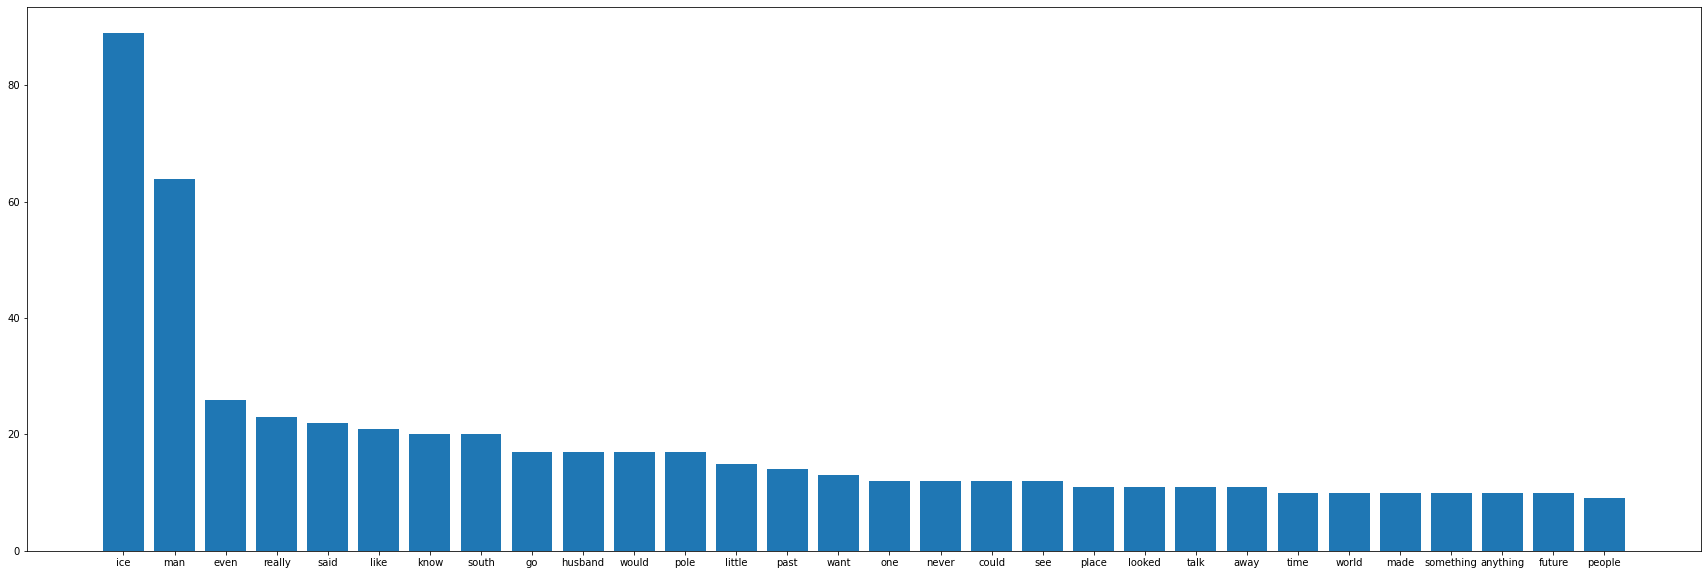

In [11]:
plt.figure(figsize=(30,10))
plt.bar(words, frequencies)
plt.show()